<a href="https://colab.research.google.com/github/princexoleo/machine-learning/blob/master/jh_deep_learning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating custom datasets from Google Images

In [0]:
from fastai.vision import *

#Get a list of URLs

**Search and Scroll** **and Download Into file**



---
This is code snippet to download imgaes from google search. For Mozila type **CtrlShiftK** For Chrome **CtrlShiftj**
```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```






#Create directory and upload urls

In [0]:
from fastai import *
from fastai.vision import *

Choose an appropriate name for labeled images.We can run these steps multiple times to grab diffent labels

In [0]:
!rm -r data/bears/teddys/

In [0]:
folder = 'black'
file = 'urls_black.txt'

In [0]:
#
folder = 'teddys'
file = 'urls_teddys.csv'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

# Download images
now we need to download images from their respective urls.

In [0]:
classes = ['teddys', 'grizzly', 'black']

In [13]:
# download_images(path/file, dest, max_pics=200)
download_images(path/file, dest, max_pics=800, max_workers=0)

We can remove any images that can't be opened

In [14]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=8)

teddys


grizzly


black


In [0]:
np.random.seed(42)

data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['black', 'grizzly', 'teddys']

In [19]:
len(data.train_ds)

1370

In [20]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [21]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.527961,0.898213,0.277778,00:14
1,1.296474,1.299901,0.336257,00:13
2,1.138228,1.059786,0.324561,00:13
3,0.951847,0.956596,0.301170,00:13
4,0.802837,0.833026,0.271930,00:13
5,0.677030,0.871605,0.289474,00:13
6,0.584371,0.806178,0.266082,00:12
7,0.504822,0.824330,0.274854,00:12
8,0.438355,0.809565,0.269006,00:12
9,0.404252,0.811129,0.260234,00:12


In [0]:
learn.save("stage-1")

In [0]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


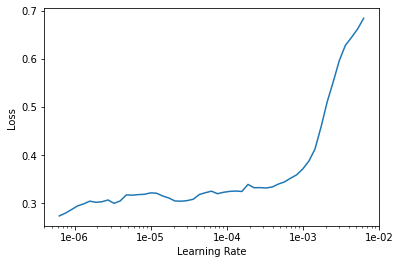

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(3e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.335597,0.805193,0.263158,00:14
1,0.320869,0.810269,0.257310,00:14


In [0]:
learn.save('stage-2')

In [28]:


interp = ClassificationInterpretation.from_learner(learn)



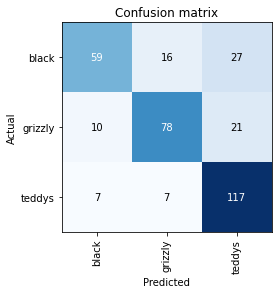

In [29]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:


learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

In [0]:
learn_cln.load('stage-2');

In [36]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)